# Regression diagnostics with statsmodels

_Author: Christoph Rahmede_

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1">Load the data</a></span></li><li><span><a href="#Fitting-with-statsmodels" data-toc-modified-id="Fitting-with-statsmodels-2">Fitting with statsmodels</a></span></li><li><span><a href="#Fit-plot" data-toc-modified-id="Fit-plot-3">Fit plot</a></span></li><li><span><a href="#Partial-regression-plot" data-toc-modified-id="Partial-regression-plot-4">Partial regression plot</a></span></li><li><span><a href="#CCPR-plot" data-toc-modified-id="CCPR-plot-5">CCPR plot</a></span></li><li><span><a href="#Outliers-and-high-leverage-points" data-toc-modified-id="Outliers-and-high-leverage-points-6">Outliers and high leverage points</a></span></li><li><span><a href="#Leverage-versus-normalized-residuals" data-toc-modified-id="Leverage-versus-normalized-residuals-7">Leverage versus normalized residuals</a></span></li><li><span><a href="#Influence-plot" data-toc-modified-id="Influence-plot-8">Influence plot</a></span></li><li><span><a href="#Cooks-distance" data-toc-modified-id="Cooks-distance-9">Cooks distance</a></span></li><li><span><a href="#Model-with-outliers-removed" data-toc-modified-id="Model-with-outliers-removed-10">Model with outliers removed</a></span></li><li><span><a href="#Variance-inflation-factor" data-toc-modified-id="Variance-inflation-factor-11">Variance inflation factor</a></span></li></ul></div>

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.simplefilter('ignore')

## Load the data

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(data.data), columns=data.feature_names)
df['target'] = data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Fitting with statsmodels

We can fit the same kind of model with statsmodels. We can work directly with the data matrices, but also the model setup with a formula is very appealing. The results will be exactly the same, but we receive some additional information.

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
predictors = [col for col in df.columns if col != 'target']

In [8]:
results = sm.OLS(df.target, sm.add_constant(df[predictors])).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          6.72e-135
Time:                        22:39:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
RM             2.6742      0.293      9.116      0.000       2.098       3.251
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
B              0.8493      0.245      3.467      0.001       0.368       1.331
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fit plot

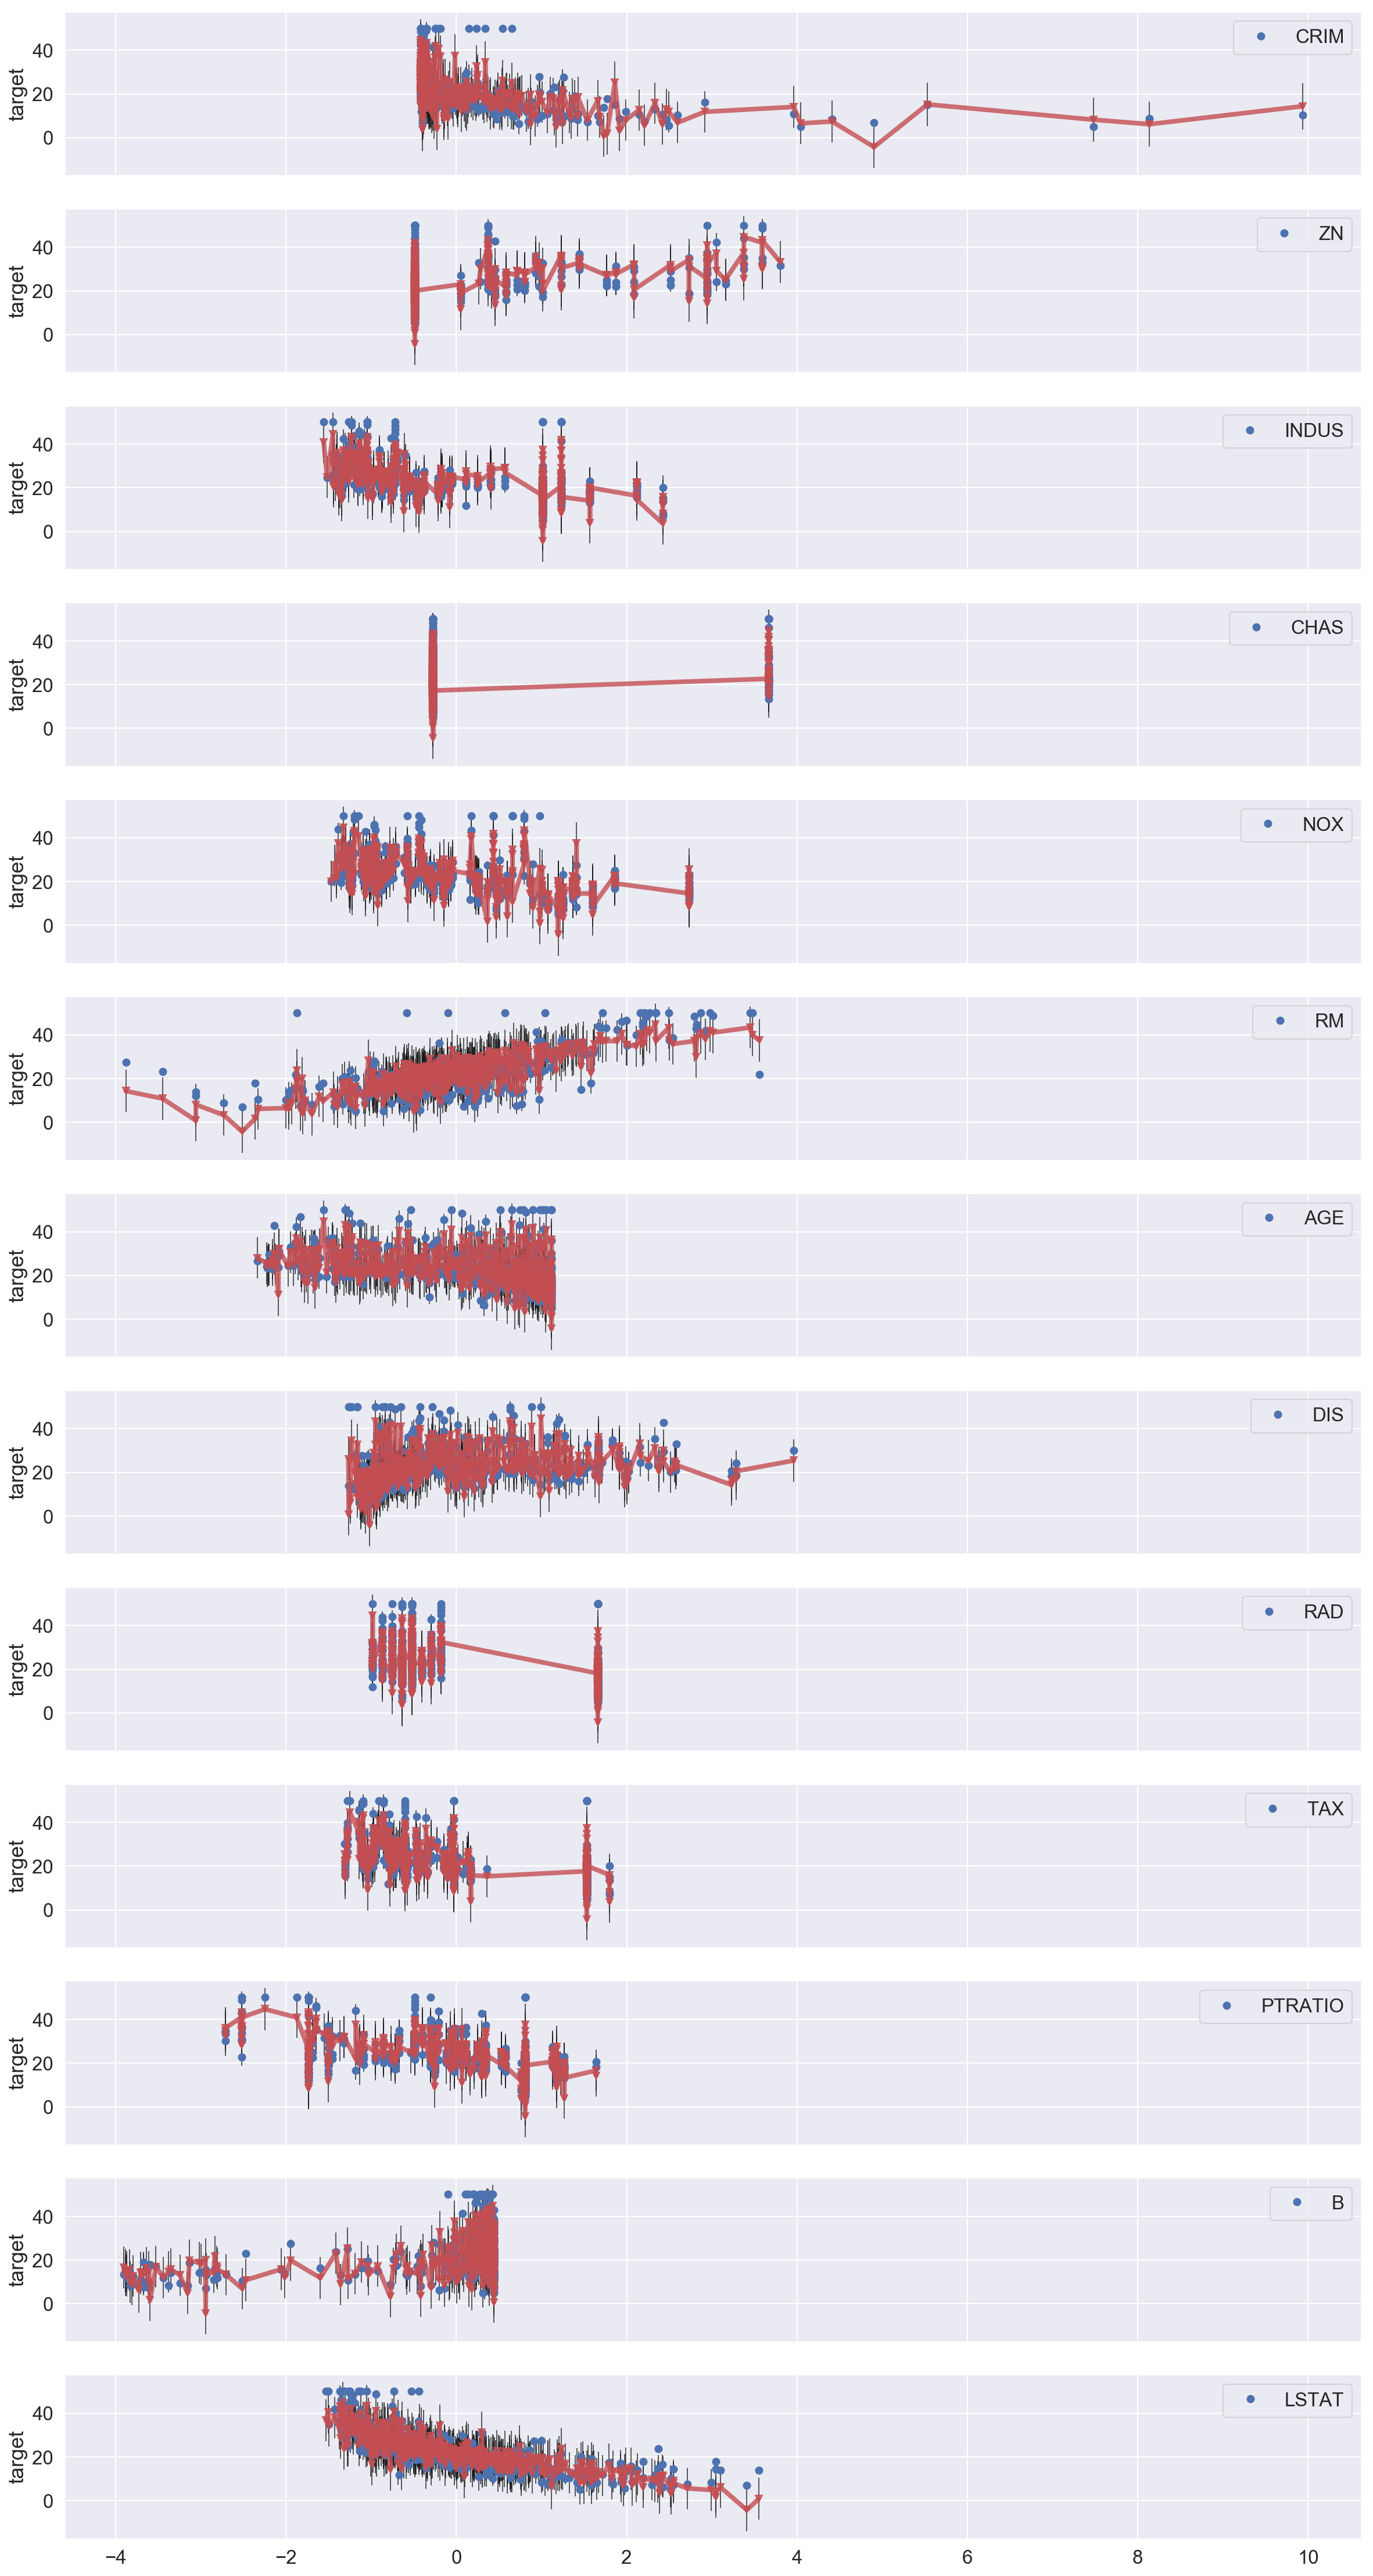

In [9]:
fig, axes = plt.subplots(nrows=len(predictors), figsize=(20, 40), sharex=True)

for ax, pred in zip(axes, predictors):
    sm.graphics.plot_fit(results=results, exog_idx=pred, y_true=None,
                         ax=ax,
                         alpha=0.8, ls='-',
                         linewidth=4,
                         marker='v')
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.legend([pred], loc='upper right')

## Partial regression plot

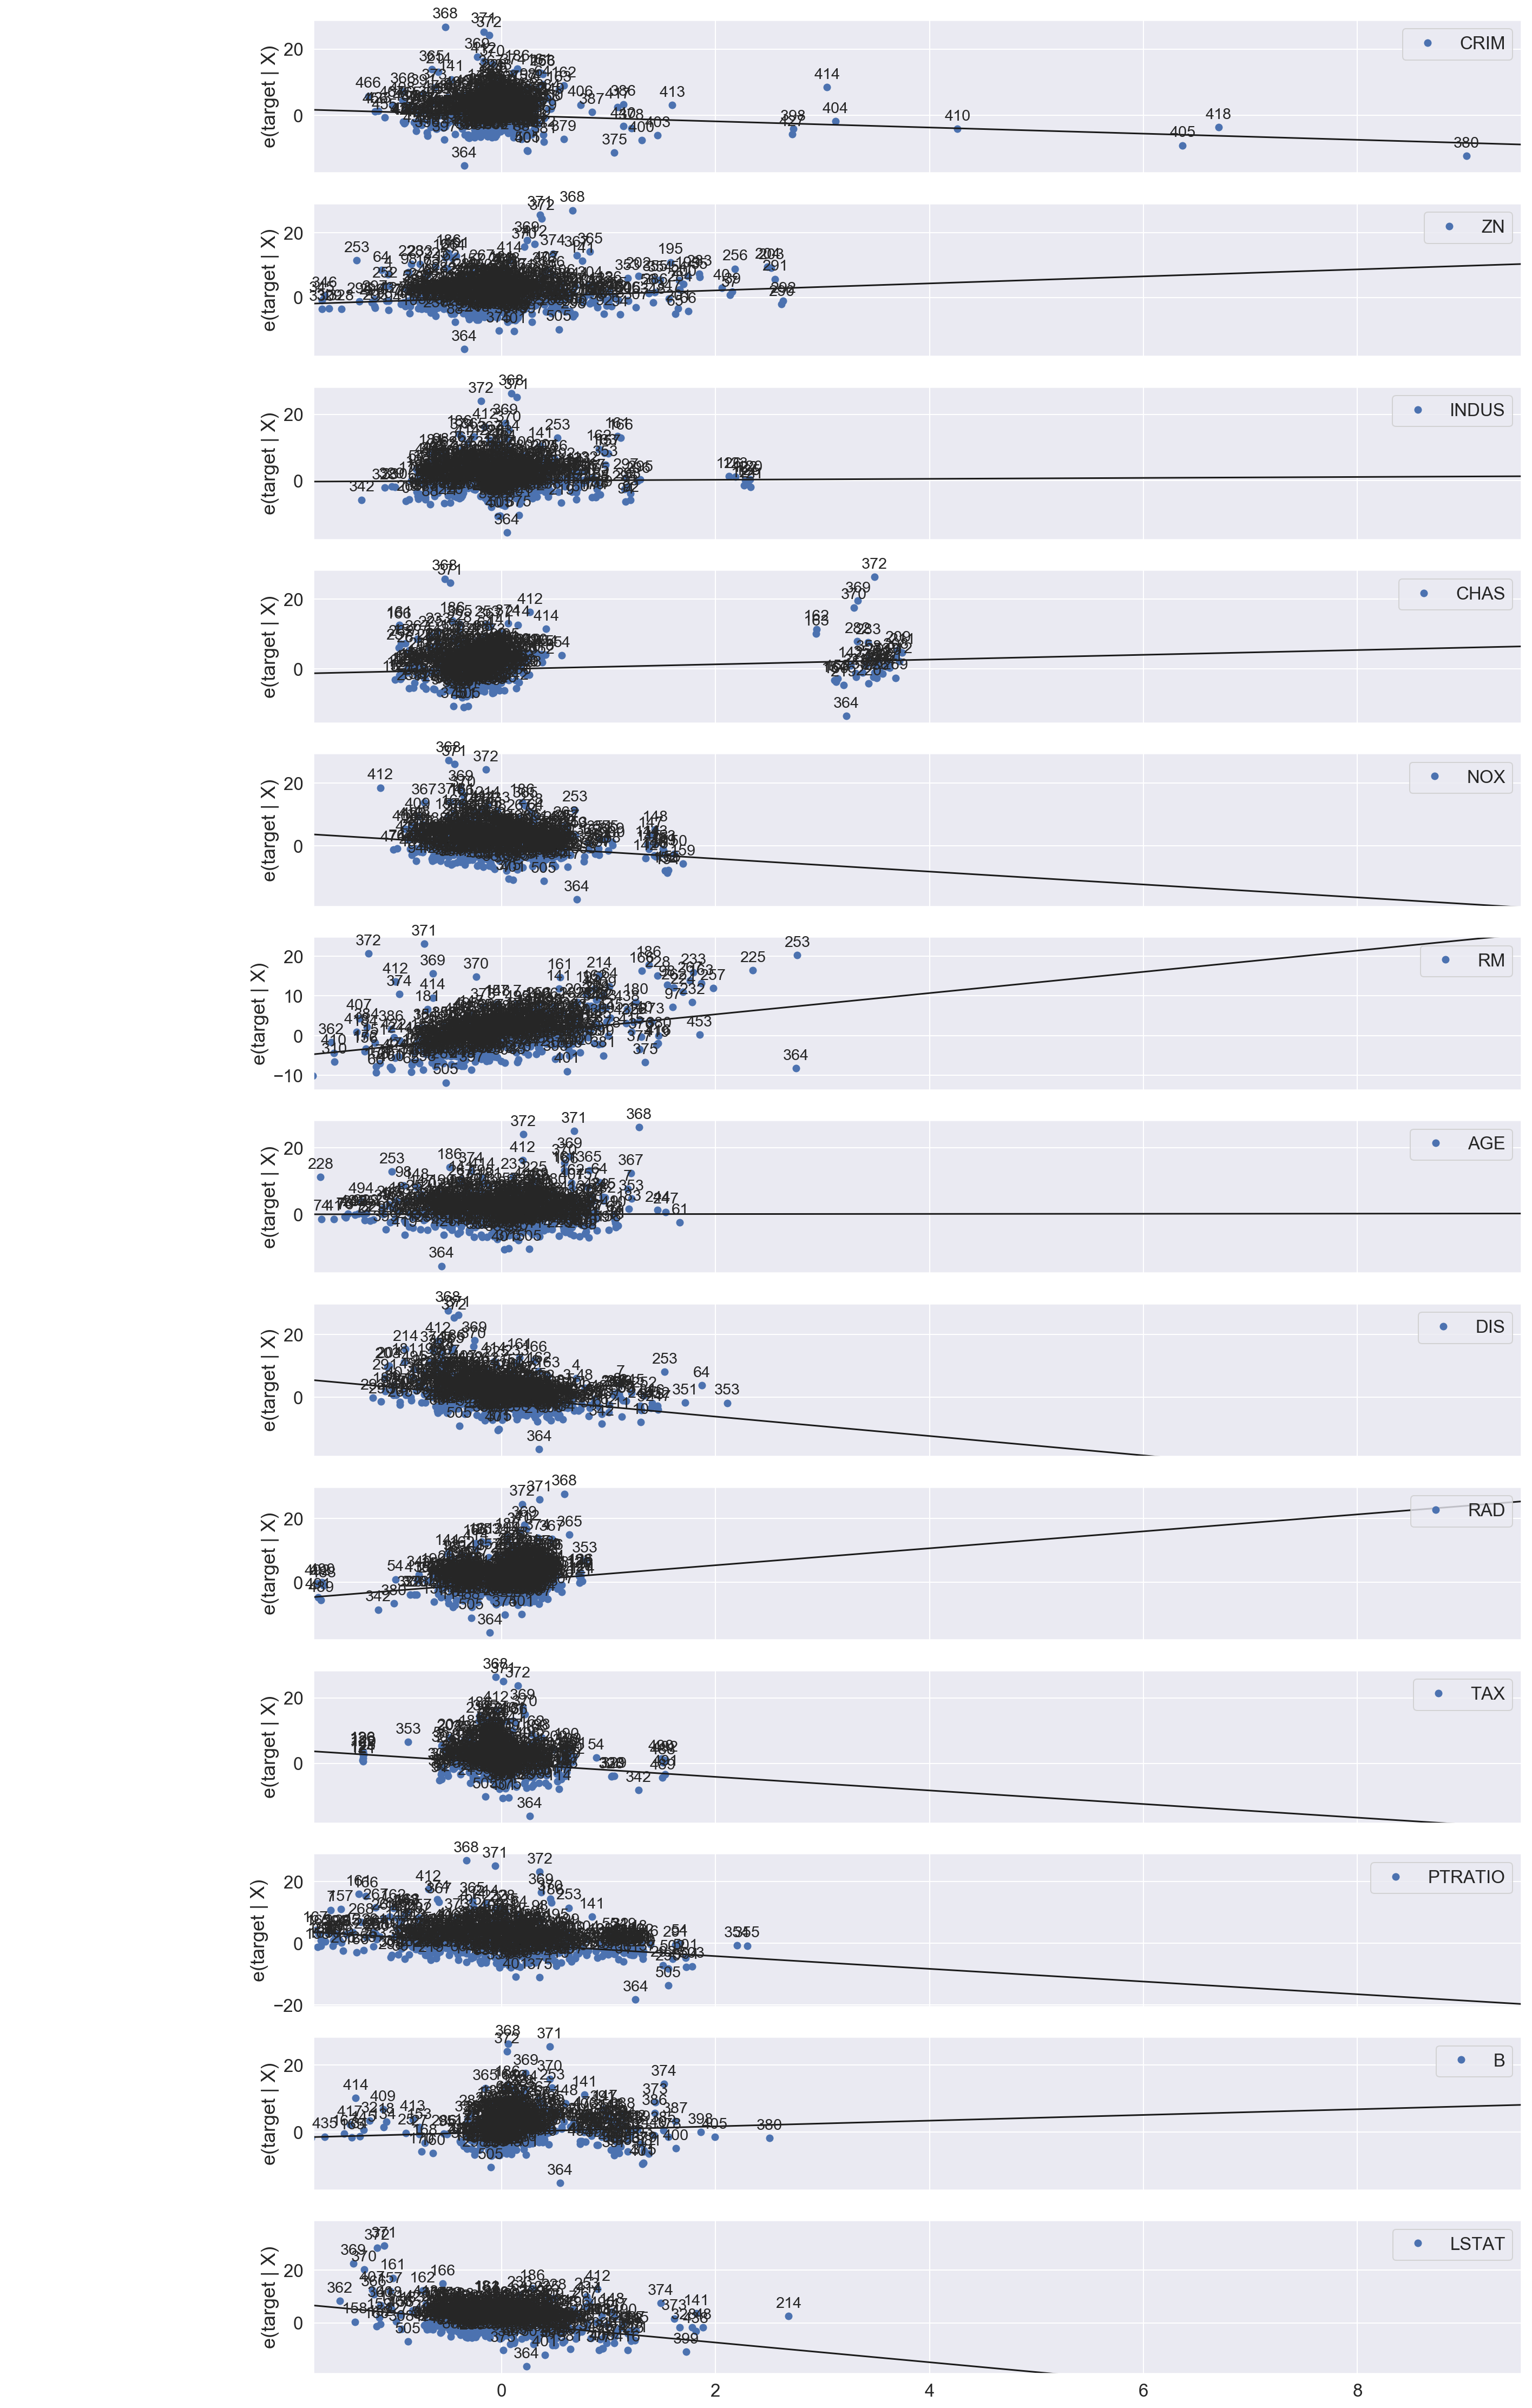

In [10]:
fig, axes = plt.subplots(nrows=len(predictors), ncols=1,
                         figsize=(20, 40), sharex=True)

for ax, pred in zip(axes, predictors):
    a = sm.graphics.plot_partregress(endog='target', exog_i=pred,
                                     exog_others=[
                                         p for p in predictors if p != pred],
                                     data=df, obs_labels=True, ret_coords=True, ax=ax, label=pred)
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.legend([pred], loc='upper right')

## CCPR plot

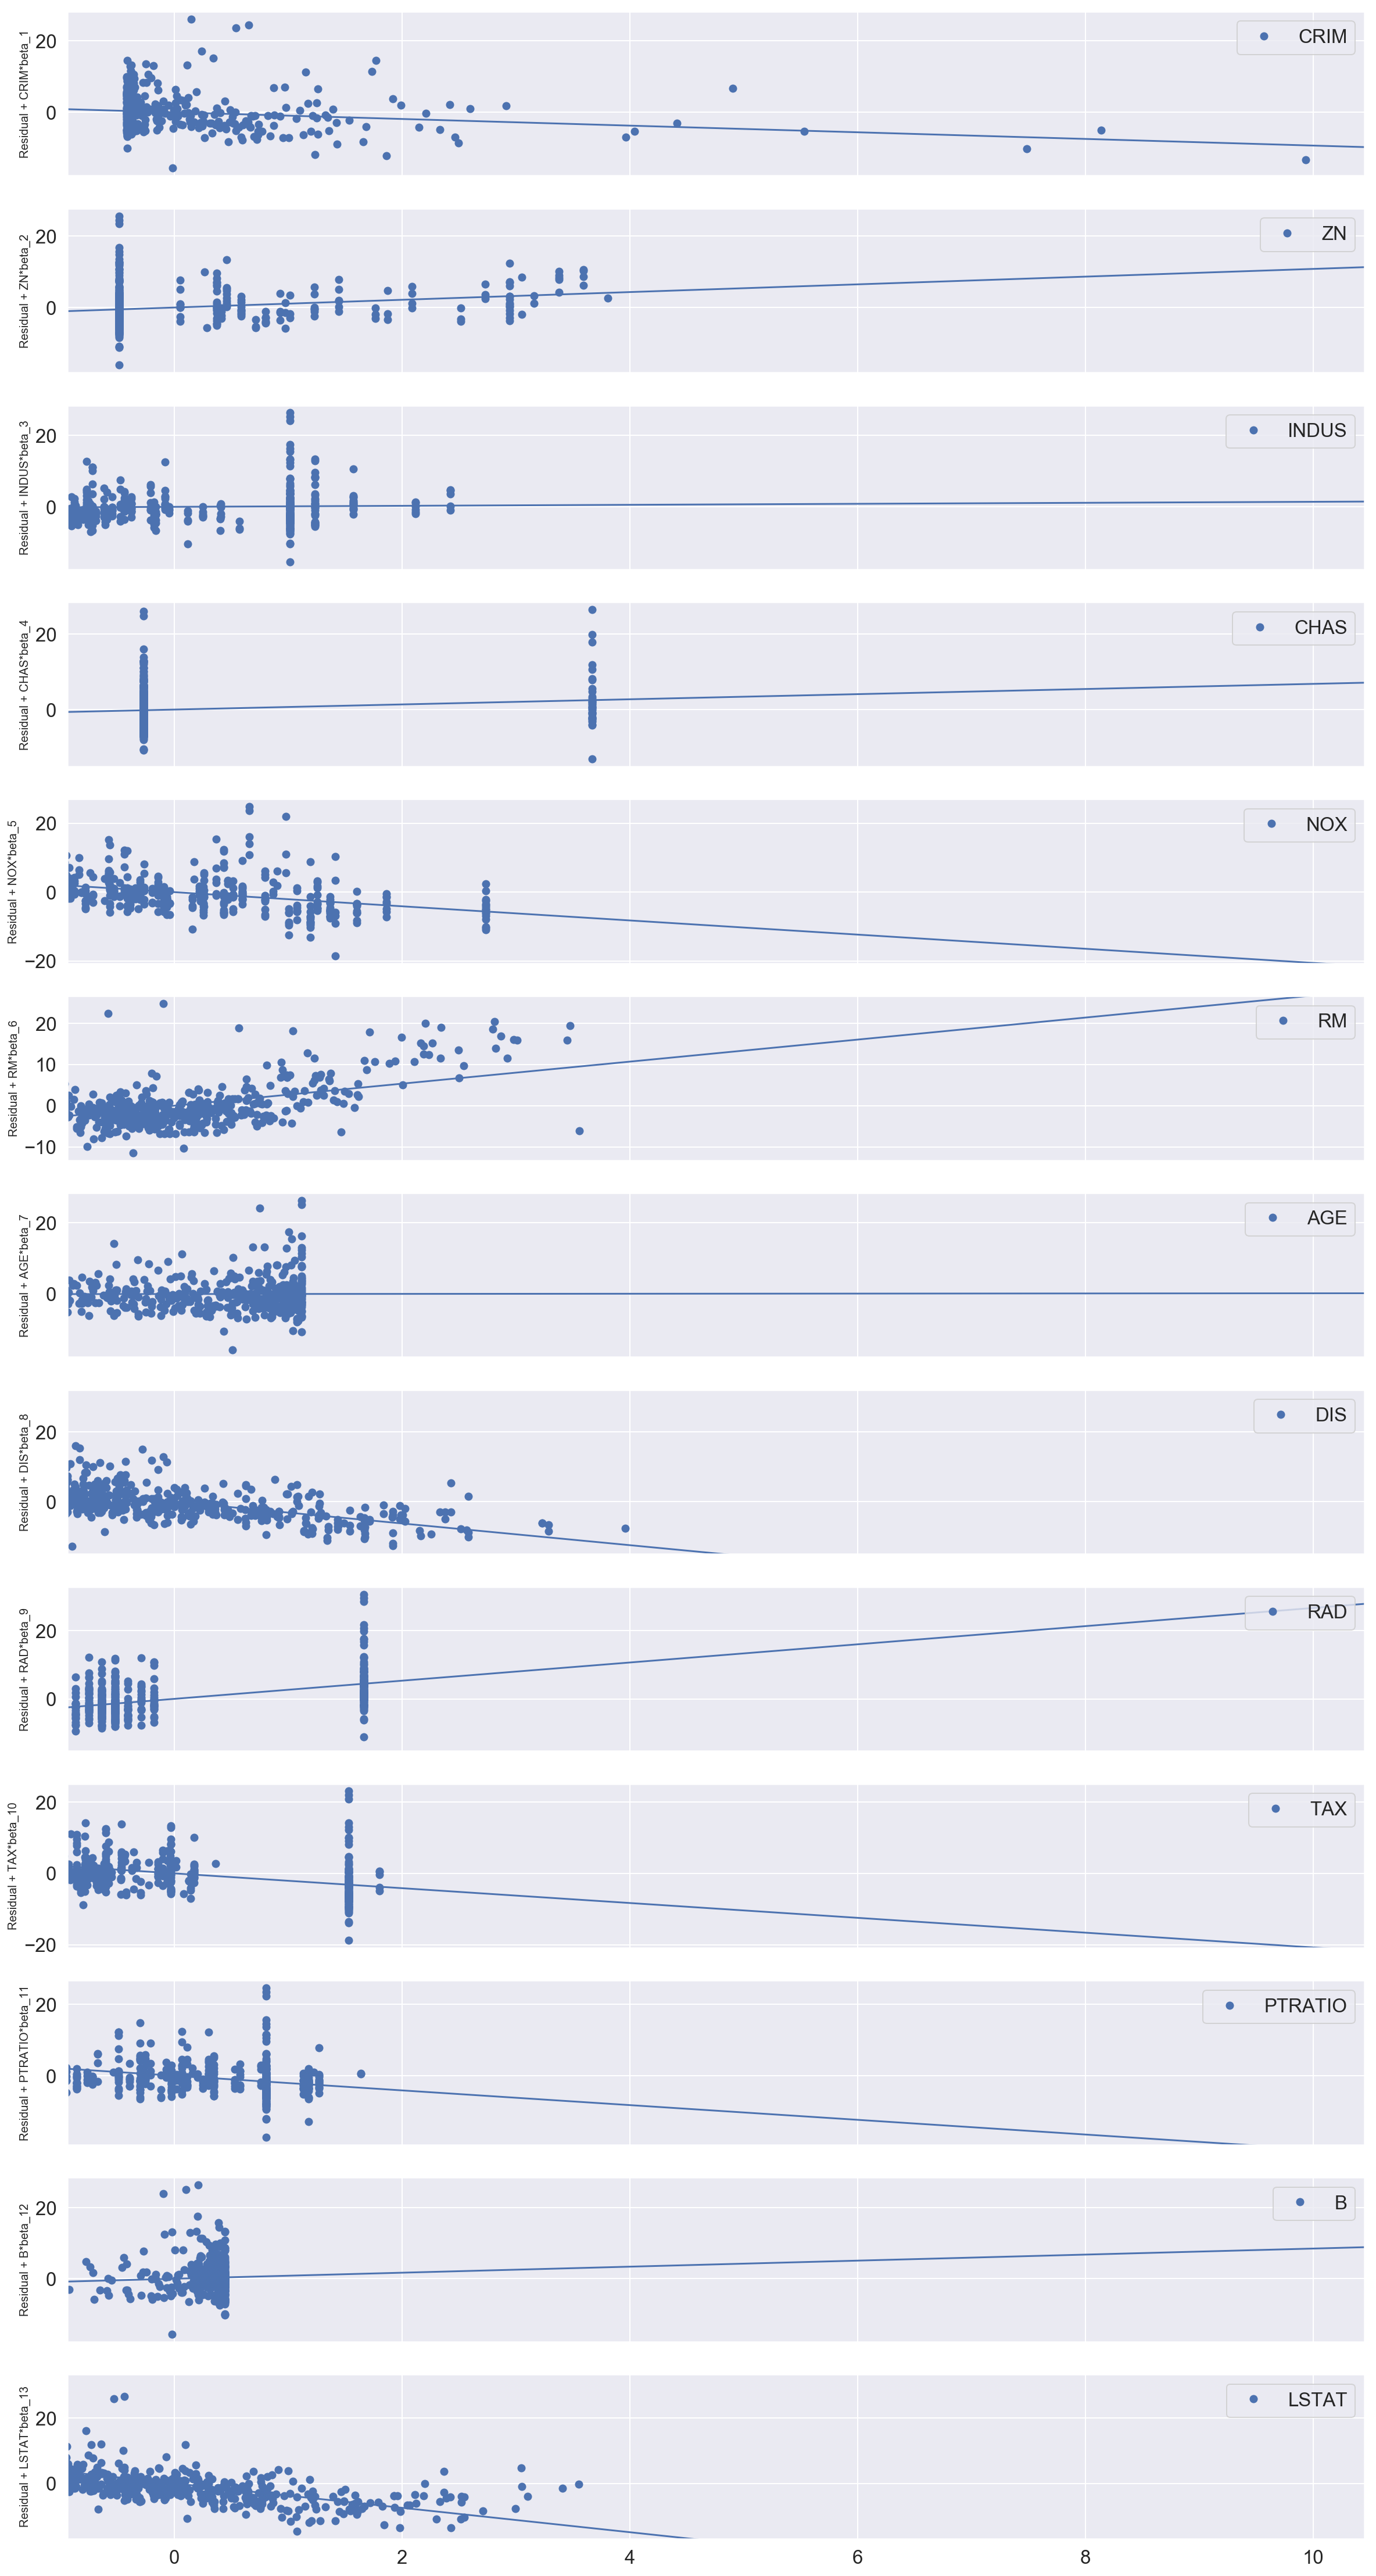

In [11]:
fig, axes = plt.subplots(nrows=len(predictors), figsize=(20, 40), sharex=True)

for ax, pred in zip(axes, predictors):
    sm.graphics.plot_ccpr(results=results, exog_idx=pred, ax=ax)
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.legend([pred], loc='upper right')

## Outliers and high leverage points

In [12]:
influence = results.get_influence()
leverage = results.get_influence().hat_matrix_diag
resid_studentized = influence.resid_studentized_internal
norm_residuals_2 = np.square(results.resid/results.resid.std())
cooks_distance = results.get_influence().cooks_distance[0]

## Leverage versus normalized residuals

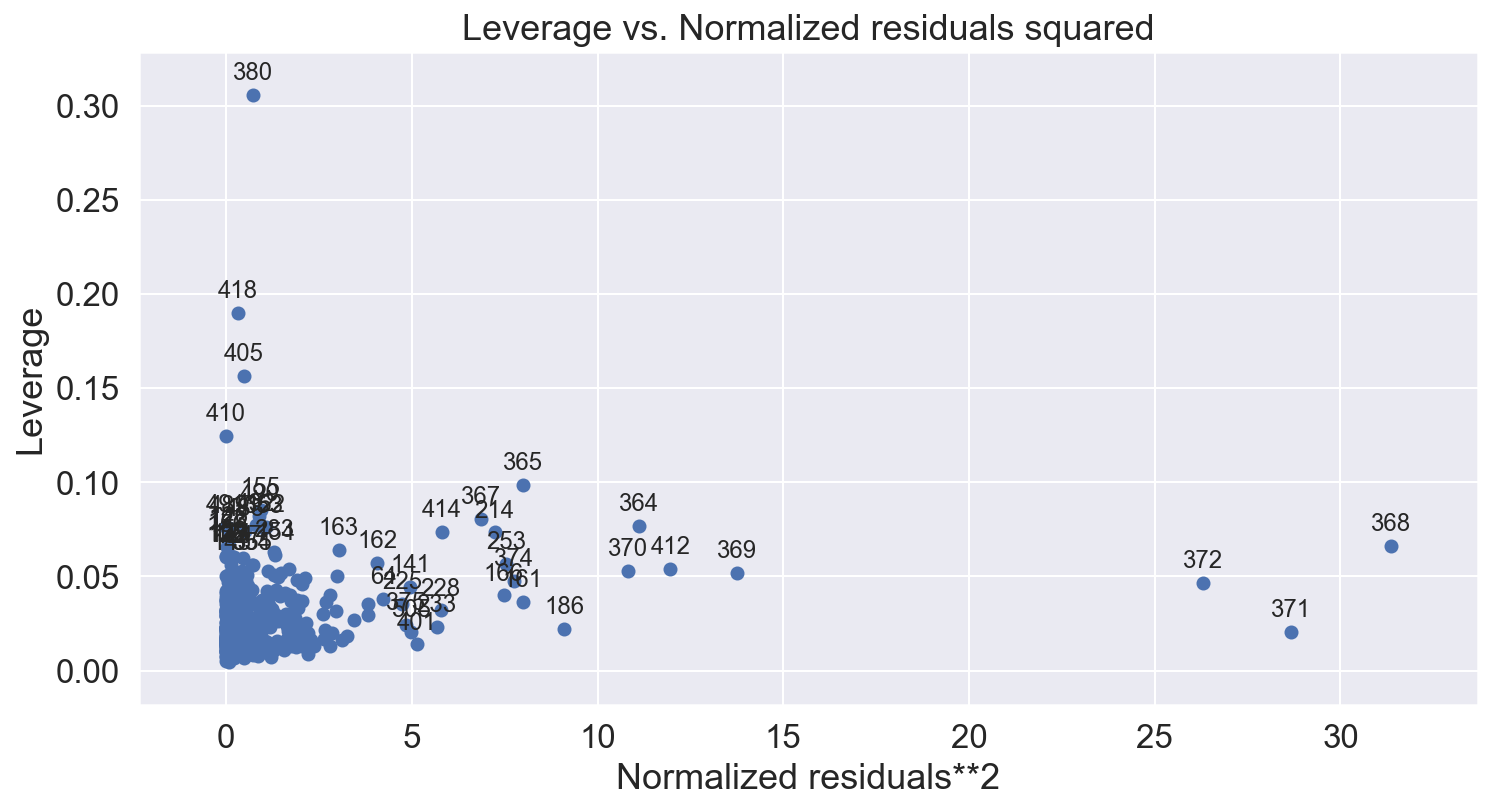

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.plot_leverage_resid2(results=results, ax=ax, alpha=0.05)
plt.show()

## Influence plot

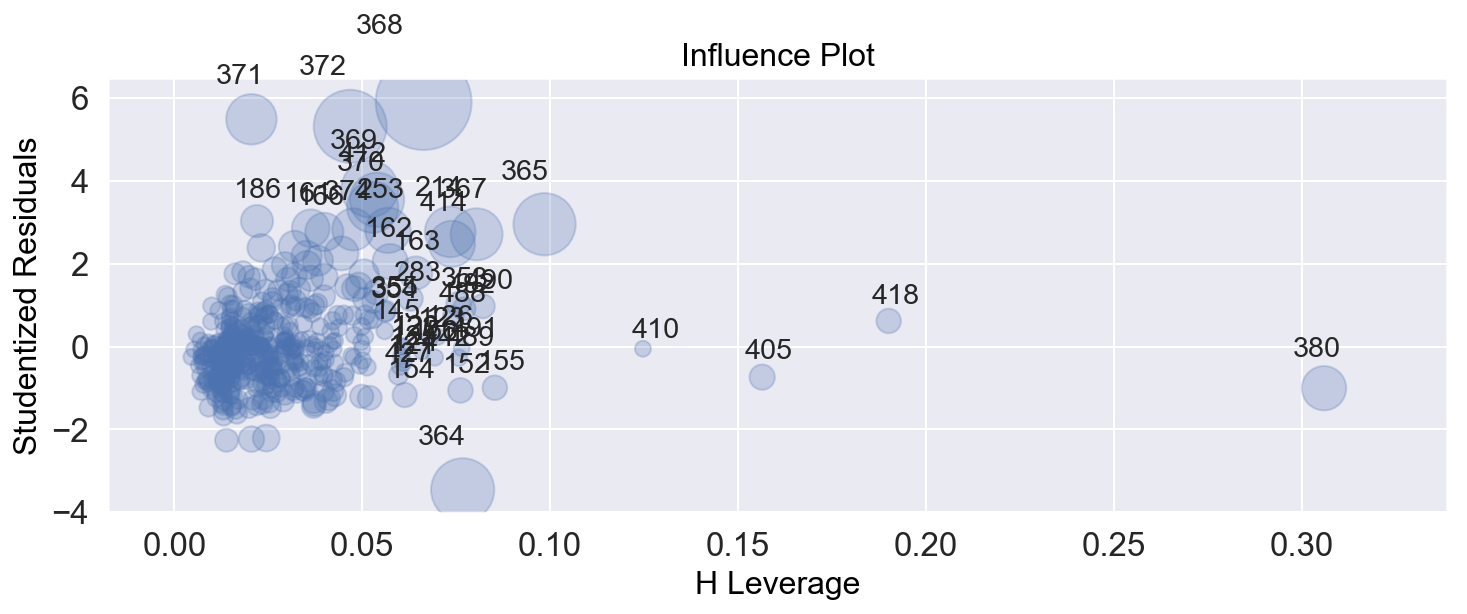

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.influence_plot(results, alpha=0.01, external=True,  # size=0.01,
                           ax=ax, color='lightblue', criterion='cook', plot_alpha=0.25)
plt.show()

## Cooks distance

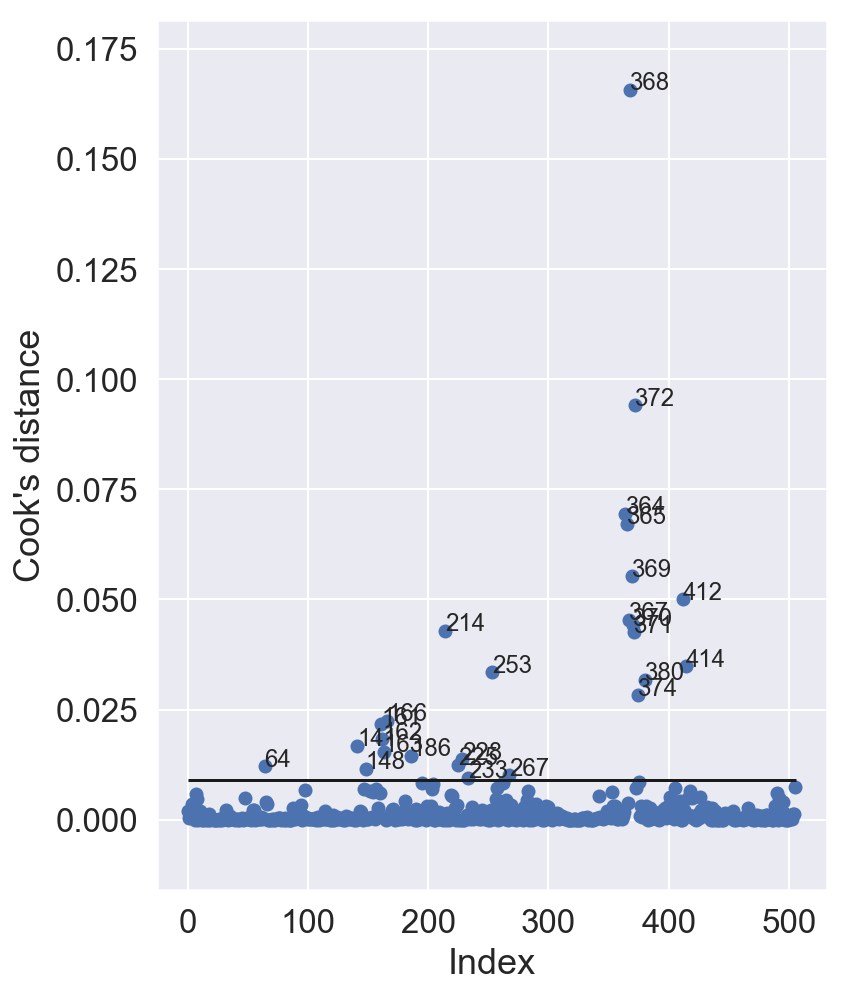

In [15]:
threshold = 3*cooks_distance.mean()
large_cook = np.argwhere(cooks_distance > threshold)
points_annot = np.concatenate([large_cook, cooks_distance[large_cook]], axis=1)

fig, ax = plt.subplots(figsize=(6, 8))
ax.scatter(range(len(cooks_distance)), cooks_distance)
ax.hlines(threshold, 0, len(cooks_distance))
for index, value in points_annot:
    ax.annotate(int(index), (index, value), fontsize=12)
ax.set_xlabel('Index')
ax.set_ylabel("Cook's distance")
plt.show()

## Model with outliers removed

In [16]:
df_no_outliers = df.copy()
df_no_outliers.drop(large_cook.ravel(), axis=0, inplace=True)

In [17]:
results.params

const      22.532806
CRIM       -0.928146
ZN          1.081569
INDUS       0.140900
CHAS        0.681740
NOX        -2.056718
RM          2.674230
AGE         0.019466
DIS        -3.104044
RAD         2.662218
TAX        -2.076782
PTRATIO    -2.060607
B           0.849268
LSTAT      -3.743627
dtype: float64

In [18]:
results.rsquared

0.7406426641094095

In [19]:
results_no_outliers = sm.OLS(df_no_outliers.target, sm.add_constant(df_no_outliers[predictors])).fit()
results_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          6.14e-173
Time:                        22:40:34   Log-Likelihood:                -1249.0
No. Observations:                 480   AIC:                             2526.
Df Residuals:                     466   BIC:                             2584.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8489      0.152    144.034      0.000      21.551      22.147
CRIM          -0.8351      0.243     -3.443      0.001      -1.312      -0.358
ZN             0.9884      0.231      4.282      0.000       0.535       1.442
INDUS         -0.1505      0.302     -0.498      0.618      -0.744       0.443
CHAS           0.3141      0.166      1.892      0.059      -0.012       0.640
NOX           -1.2030      0.320     -3.764      0.000      -1.831      -0.575
RM             3.4843      0.257     13.539      0.000       2.979       3.990
AGE           -0.6306      0.280     -2.253      0.025      -1.181      -0.081
DIS           -2.4894      0.308     -8.085      0.000      -3.095      -1.884
RAD            1.8015      0.417      4.318      0.000       0.982       2.621
TAX           -2.1205      0.445     -4.762      0.000      -2.996      -1.246
PTRATIO       -1.7060      0.202     -8.435      0.000      -2.103      -1.309
B              0.9567      0.178      5.372      0.000       0.607       1.307
LSTAT         -2.4737      0.300     -8.244      0.000      -3.063      -1.884
==============================================================================
Omnibus:                       19.930   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.156
Skew:                           0.427   Prob(JB):                     9.37e-06
Kurtosis:                       3.656   Cond. No.                         9.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance inflation factor

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
X = df[[col for col in df.columns if col not in ['target']]]

In [27]:
X.shape

(506, 13)

In [28]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[1.7921915474332395,
 2.29875817874944,
 3.9915964183460333,
 1.073995327553787,
 4.393719847577495,
 1.9337444357832558,
 3.100825512815335,
 3.95594490637273,
 7.484496335274466,
 9.00855394759707,
 1.799084049248898,
 1.3485210764063753,
 2.9414910780919348]

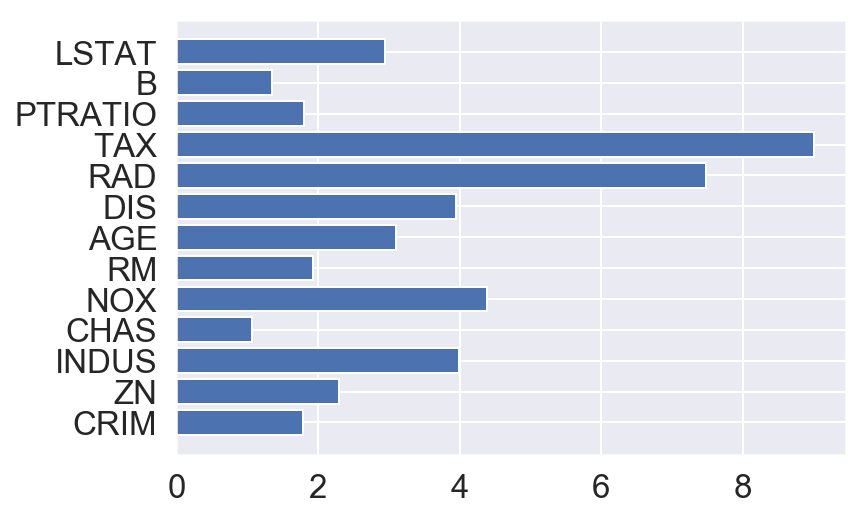

In [29]:
plt.barh(X.columns, vif)
plt.show()